In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/mobile_price_classification.csv")
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.shape

(2000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [ ]:
df.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
#defining features and labels
X=df.drop(['price_range'],axis=1).values
y=df['price_range'].values

In [ ]:
#reshaping the target
y = y.reshape(-1,1)

In [ ]:
#onehot encoding of target
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()
y = one.fit_transform(y)
y = y.toarray()

In [ ]:
#scaling the feature values using standard scaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [ ]:
#splitting the dataset for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [ ]:
#importing functions for buliding neural network
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#building the neural network
model=Sequential()
model.add(Dense(22,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
#compiling the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#fitting the model
history=model.fit(X_train,y_train,validation_split=0.2,epochs=100)

Epoch 1/100
38/38 [==============================] - 1s 5ms/step - loss: 1.5341 - accuracy: 0.2650 - val_loss: 1.4313 - val_accuracy: 0.2867
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 1.4218 - accuracy: 0.3117 - val_loss: 1.3501 - val_accuracy: 0.3700
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 1.3355 - accuracy: 0.3867 - val_loss: 1.2795 - val_accuracy: 0.4333
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 1.2573 - accuracy: 0.4575 - val_loss: 1.2153 - val_accuracy: 0.4633
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 1.1842 - accuracy: 0.5142 - val_loss: 1.1504 - val_accuracy: 0.5033
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 1.1122 - accuracy: 0.5583 - val_loss: 1.0827 - val_accuracy: 0.5400
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 1.0411 - accuracy: 0.5967 - val_loss: 1.0192 - val_accuracy: 0.5900
Epoch 8/100
3

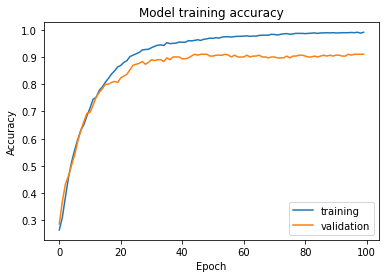

In [ ]:
#plotting Model accuracy v/s Epoch
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model training accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

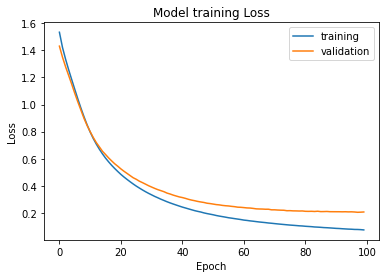

In [ ]:
#plotting Model Loss v/s Epoch
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

In [ ]:
#prediction of test values
y_pred=model.predict(X_test)

16/16 [==============================] - 0s 898us/step


In [ ]:
#we have encoded the labels.

#lets do the inverse one hot encoding for predicted labels
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
#also inverse encoding for actual labels

test = []
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [ ]:
# accuracy of the model
from sklearn.metrics import accuracy_score
print("Accuracy of the Model is : " ,round(accuracy_score(pred,test)*100,2))

Accuracy of the Model is :  93.8
